In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_infected_dir = os.path.join('/content/drive/MyDrive/Data/Infected_cherry')
train_healthy_dir =  os.path.join('/content/drive/MyDrive/Data/Healthy_cherry')



In [ ]:
train_infected_images = os.listdir(train_infected_dir)
print(train_infected_images[:10])
train_healthy_images = os.listdir(train_healthy_dir)
print(train_healthy_images[:10])

['image (1000).JPG', 'image (101).JPG', 'image (103).JPG', 'image (100).JPG', 'image (102).JPG', 'image (1).JPG', 'image (10).JPG', 'image (125).JPG', 'image (122).JPG', 'image (110).JPG']
['image (120).JPG', 'image (113).JPG', 'image (101).JPG', 'image (123).JPG', 'image (102).JPG', 'image (116).JPG', 'image (117).JPG', 'image (100).JPG', 'image (114).JPG', 'image (109).JPG']


In [ ]:
print('total training healthy images: ', len(os.listdir(train_healthy_dir)))
print('total training infected images:', len(os.listdir(train_infected_dir)))

total training healthy images:  1000
total training infected images: 1000


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

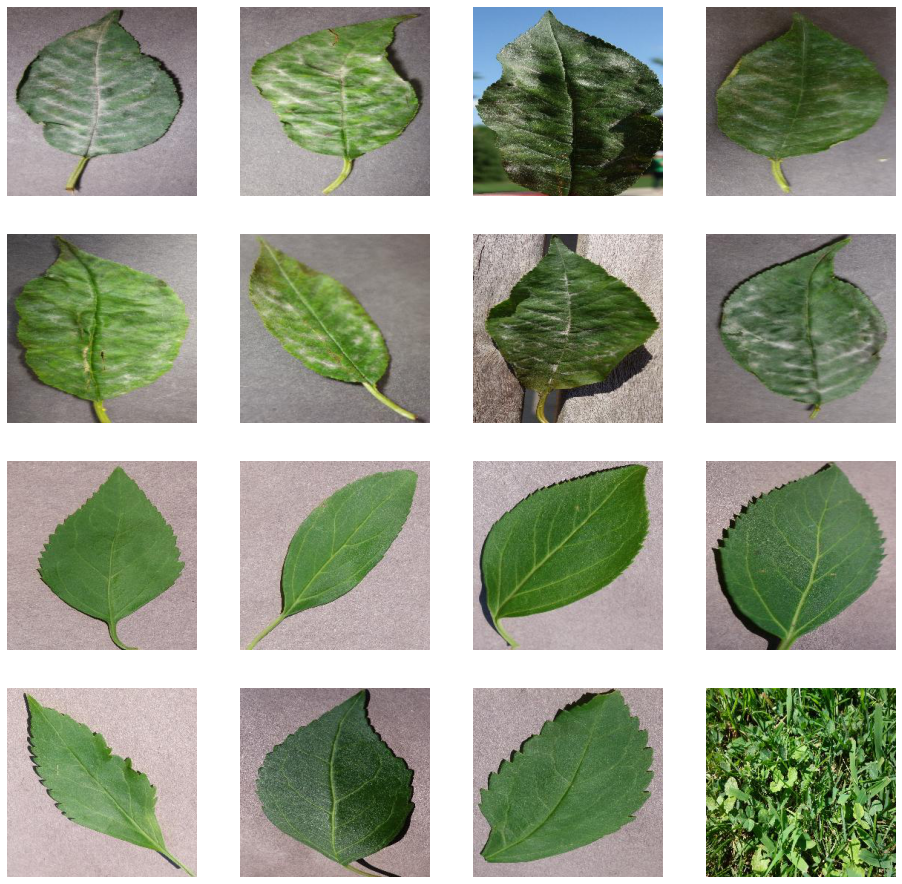

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_infected_pix = [os.path.join(train_infected_dir, fname) 
                for fname in train_infected_images[pic_index-8:pic_index]]
next_healthy_pix = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_images[pic_index-8:pic_index]]

for i, img_path in enumerate(next_infected_pix+next_healthy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Data',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,  
      epochs=10,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
5/5 [==============================] - 108s 20s/step - loss: 0.8506 - acc: 0.5750
Epoch 2/10
5/5 [==============================] - 69s 12s/step - loss: 0.6551 - acc: 0.6469
Epoch 3/10
5/5 [==============================] - 59s 10s/step - loss: 0.8658 - acc: 0.5051
Epoch 4/10
5/5 [==============================] - 62s 11s/step - loss: 0.5939 - acc: 0.6938
Epoch 5/10
5/5 [==============================] - 58s 11s/step - loss: 0.5755 - acc: 0.7781
Epoch 6/10
5/5 [==============================] - 58s 11s/step - loss: 0.5061 - acc: 0.7891
Epoch 7/10
5/5 [==============================] - 53s 10s/step - loss: 0.6263 - acc: 0.7584
Epoch 8/10
5/5 [==============================] - 57s 11s/step - loss: 0.4255 - acc: 0.8750
Epoch 9/10
5/5 [==============================] - 58s 11s/step - loss: 0.3142 - acc: 0.9016
Epoch 10/10
5/5 [==============================] - 52s 10s/step - loss: 0.3684 - acc: 0.8547


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image



uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is infected with powdery mildew")
  else:
    print(fn + " is healthy plant")

In [ ]:
plt.plot(history_model.history['acc'])
plt.plot(history_model.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()